## 1a) Derivative 
$f(x)  = - x^4 + 2 x^3 + 2x^2 -x$, 
<br>
<br>
$f'(x) = -4x^3 + 6x^2 + 4x -1$

## 1b) Plot

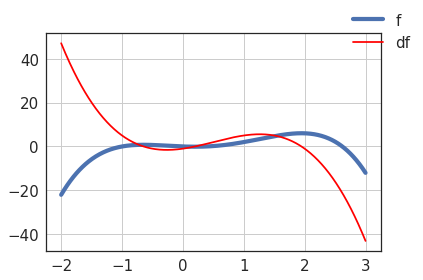

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn
seaborn.set(style="white", context="notebook", font_scale=1.5,
            rc={"axes.grid": True, "legend.frameon": False,
"lines.markeredgewidth": 1.4, "lines.markersize": 10})

start = -2
stop = 3
numberOfPoints = 500
x = np.linspace(start, stop, numberOfPoints)
fig, ax = plt.subplots()
f = lambda x: -x**4 + 2*x**3 + 2*x**2 - x
df = lambda x: -4*x**3 + 6*x**2 + 4*x -1
ax.plot(x, f(x), label='f', linewidth=4.2)
ax.plot(x, df(x), 'r', label='df')
fig.legend()
plt.show()

In [39]:
indexMax = np.argmax(f(x))
print('max x ',x[indexMax], ', df(maxX) ', df(x[indexMax]) )

max x  1.947895791583166 , df(maxX)  -0.006217285153230279


## 1c) Gradient ascent and Exhaustive search class

In [92]:
class maximumFinder:
    def __init__(self, xMin, xMax, x0, stepSize, tolerance, maxIterations, derivative):
        self.xMin, self.xMax, self.x0, self.stepSize, self.tolerance, self.maxIterations, self.derivative = \
        xMin, xMax, x0, stepSize, tolerance, maxIterations, derivative
        
    def gradientDescent(self):
        xMin, xMax, x0, stepSize, tolerance, maxIterations, derivative = \
        self.xMin, self.xMax, self.x0, self.stepSize, self.tolerance, self.maxIterations, self.derivative
        xOld = x0
        difference = 100
        iteration = 1
        xValues = []
        xValues.append(x0)
        while difference > tolerance and iteration < maxIterations:
            #print('df', derivative(xOld))#, '\n')
            x = xOld + stepSize*derivative(xOld)
            if x < xMin:
                x = xMin
            elif x > xMax:
                x = xMax
            difference = abs(x-xOld)
            #print('x ', x, 'difference ', difference, '\n')
            iteration += 1
            xOld = x
            xValues.append(x)
        self.xValues = xValues
        
    def exhaustiveSearch(self, f):
        xMin, xMax, x0, stepSize, tolerance, maxIterations, derivative, f = \
        self.xMin, self.xMax, self.x0, self.stepSize, self.tolerance, self.maxIterations, self.derivative, f
        maximum = xMin
        fMax = f(xMin)
        step = 0.5
        xS = np.arange(xMin, xMax+step, step)
        print(xS)
        maximums = []
        maximums.append(xMin)
        for x in xS:
            if f(x) >= fMax:
                maximum = x
                fMax = f(x)
            maximums.append(maximum)
        
        self.xValues = maximums
        
    def plot(self, circles):
        xValues = np.asarray(self.xValues)
        iterations = np.asarray(range(len(xValues)))
        fig, ax = plt.subplots()
        #ax.set_title('x0 = %.1f' %x0)
        if circles:
            ax.plot(iterations, xValues, 'ro')
        else:
            ax.plot(iterations, xValues)
        ax.set_xlabel('Iteration number')
        ax.set_ylabel('xValue')

### Gradient ascent results

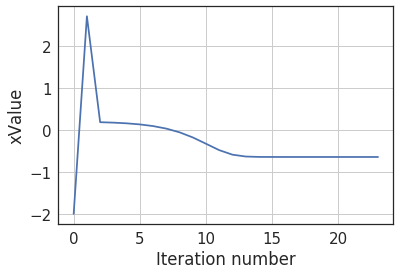

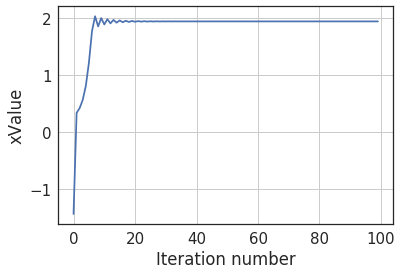

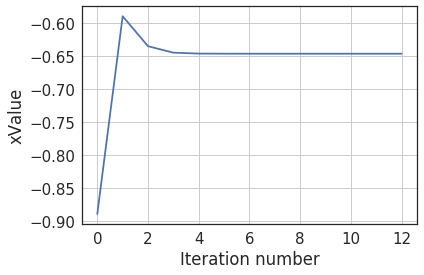

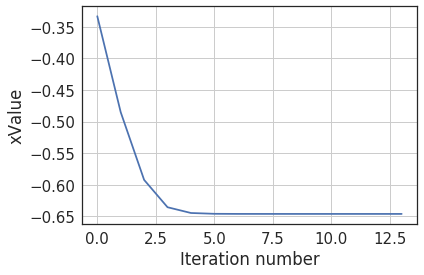

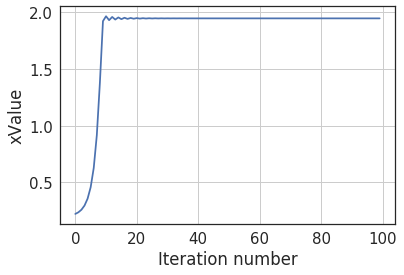

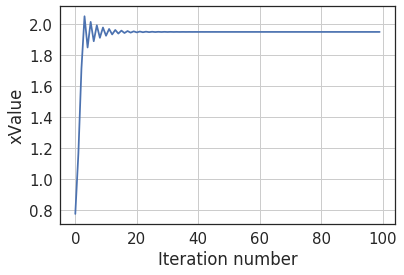

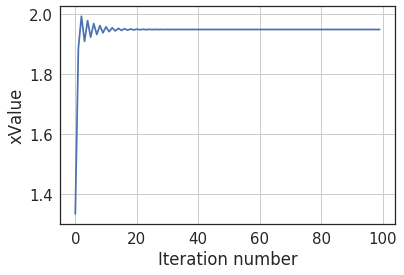

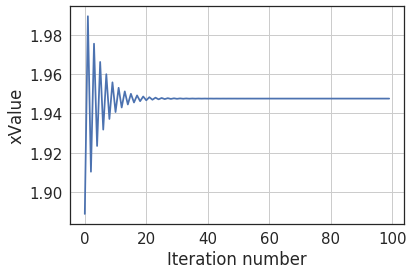

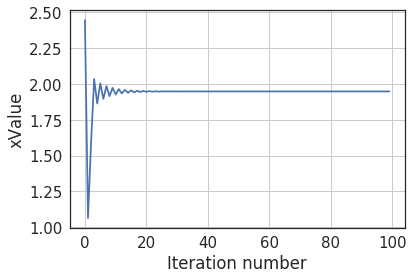

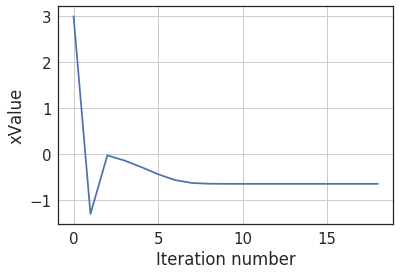

In [95]:
xMin = -2
xMax = 3
stepSize = 0.1
maxIterations = 100
tolerance =  1e-10
circles = 0

for x0 in np.linspace(-2, 3, 10):
    ga = maximumFinder(xMin, xMax, x0, stepSize, tolerance, maxIterations, df)
    ga.gradientDescent()
    ga.plot(circles)

### Unable finding maximum
<mark>Where gradient is zero, the algo stops right away.<mark>

## 1d) Exhaustive search

[-2.  -1.5 -1.  -0.5  0.   0.5  1.   1.5  2.   2.5  3. ]


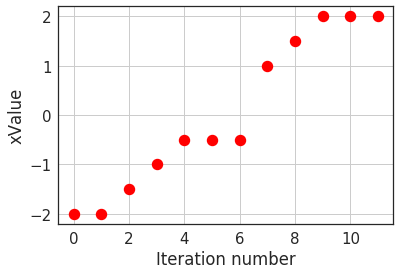

In [96]:
es = maximumFinder(xMin, xMax, x0, stepSize, tolerance, maxIterations, df)
es.exhaustiveSearch(f)
circles = 1
es.plot(circles)

## 1e) Greedy search: 
<mark>GREEDY IS WRONG. Slack note from Kai, and link on course site. Also what I describe as greedy here can be a hill climber, a hill climber can use several neighbors.

Definition: Starts with initial value and evaluates <mark>all close neighbors. <mark>

Difference from Gradient ascent: 
<br>
<mark>Needs to evaluate all neighbors, which is more computationally costly.<mark>
<br>
<mark>In contrast to gradient ascent, do not need a function for greedy surch. <mark>

### Hill climbing
<br>
Definition: <mark> Goes in one random direction <mark> and choose it if it is better.
<br>
    
Difference from Gradient Ascent:
<br>
1) Direction is random.

### Hill climbing vs. greedy search
<br>
At or close to a local minimum. The hill climber has then a 50/50 chanse of going in each direction, where the directions leads to different local maxima. 
<br>
The greedy search will choose the direction with the largest value.
<br>
<mark> Hill can be better,since more random, giving less probaility get trapped in local maximma. <mark>

## 1f) Possible improvements the three algorithms
<br>
Goal: Find global maxima, not only local maxima.
<br>
Solutions:
<br>
1) Proability going wrong way
<br>
2)<mark>Compare solutions different starting points. <mark>
<br>
3) <mark> More random movement to algo.
<br>
The points aboove goes for both the hill climber algo and the gready search algo.

## 1g) Exhaustive serach vs. simulated annealing
<br>
SImulated annealing (accepting worse moves somtimes) is in general faster. For this problem, which is very small, however, maybe it will be just as fast with exhaustive search